In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import matplotlib
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (16, 9)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
X = tf.placeholder(tf.float32, shape=(None, 28*28))
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
Y = tf.sigmoid(tf.matmul(X, W) + b)
Y_ = tf.placeholder(tf.float32, (None, 10))
weights_t = tf.transpose(W)

In [6]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.003).minimize(cross_entropy)

In [7]:
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
def showWeights(weights):
    width, height = 10, 10
    rows, columns = 4, 3
    for i in range(1, columns*rows +1):
        if i > 10:
            break
        img = weights[i-1]
        img.shape = (28, 28)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        fig.canvas.draw()

<IPython.core.display.Javascript object>


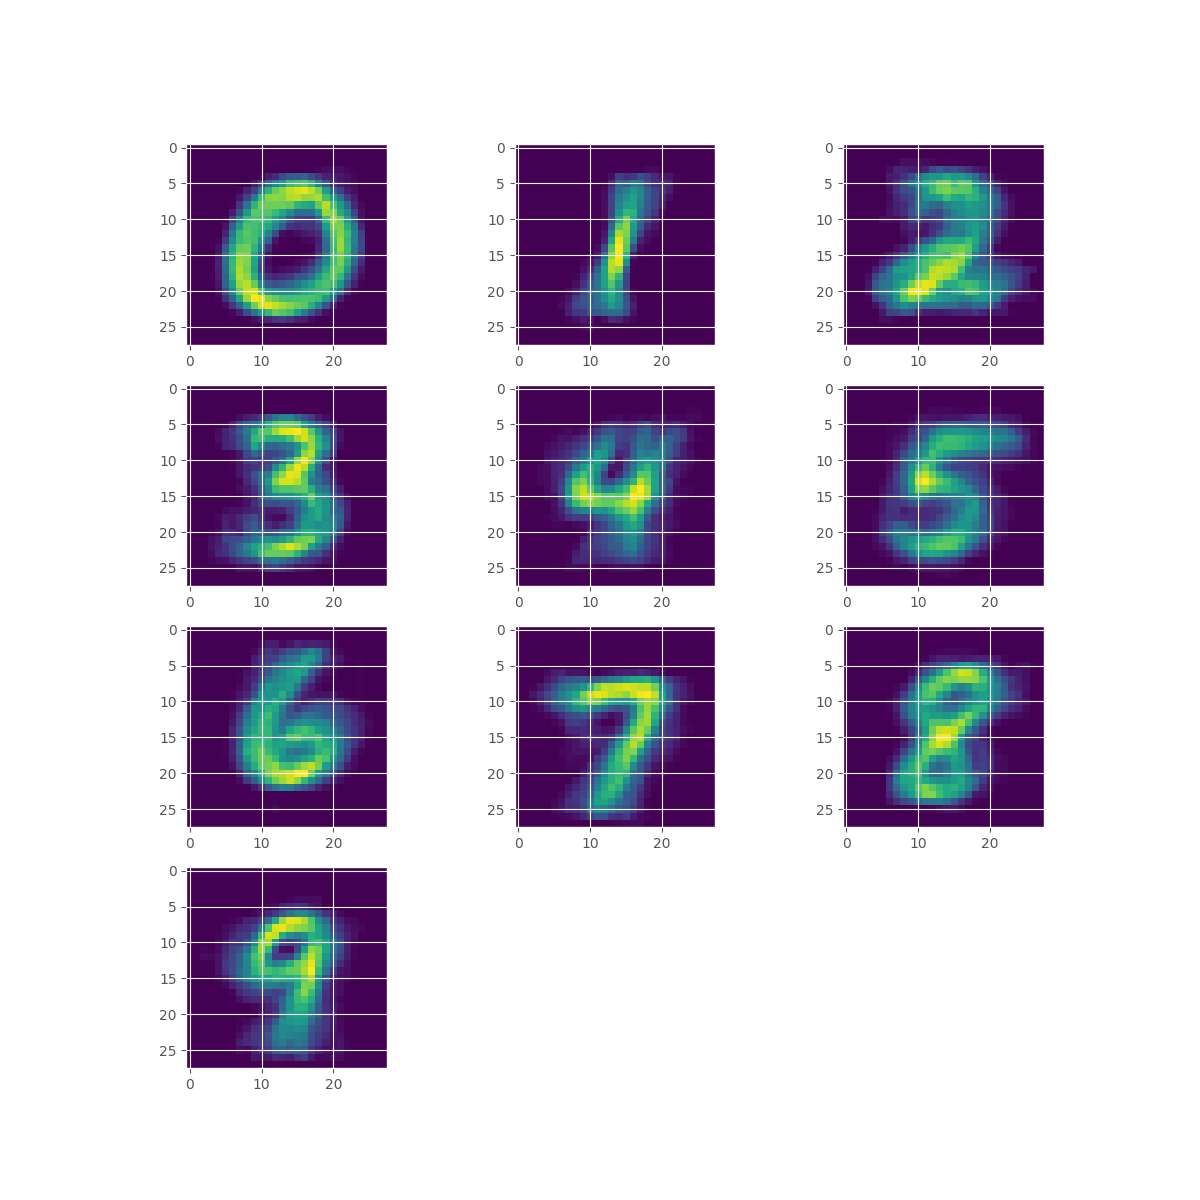

In [ ]:
epochs = 100
fig = plt.figure(figsize=(12, 12))

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

train_ac, test_ac = 0, 0
for i in range(epochs):
    batch_X, batch_Y = mnist.train.next_batch(5)
#     print batch_X.shape
    train_data = {X: batch_X, Y_: batch_Y}
    
    # Training Step
    session.run(optimizer, feed_dict=train_data)
    
    # Plot the learned weights to get the intutive picture of what is happending behind the scenes
    adjusted_weights = session.run(weights_t, feed_dict=train_data)
    showWeights(adjusted_weights)
    
    # Calculate accuracy of the model on the training data in the current epoch
    train_ac = session.run(accuracy, feed_dict=train_data)
    
    # Calculate accuracy of the model on the test data in the current epoch
    test_data = {X: mnist.test.images, Y_: mnist.test.labels}
    test_ac = session.run(accuracy, feed_dict=test_data)
    
print "Train and Test accuracies are : ", train_ac, test_ac
    
    